In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from collections import Counter

%matplotlib inline

In [2]:
tweets=pd.read_csv('/home/german/notebooks/TP1-Cuarentena/train.csv')

In [4]:
tweets['exclamacion'] = tweets['text'].str.count("!")
tweets['hashtag'] = tweets['text'].str.count("#")
tweets['at'] = tweets['text'].str.count("@")

In [5]:
tweets.describe()

,id,target,exclamacion,hashtag,at
count,7613.000000,7613.00000,7613.000000,7613.000000,7613.000000
mean,5441.934848,0.42966,0.154079,0.446999,0.362406
std,3137.116090,0.49506,0.619387,1.099841,0.720097
min,1.000000,0.00000,0.000000,0.000000,0.000000
25%,2734.000000,0.00000,0.000000,0.000000,0.000000
50%,5408.000000,0.00000,0.000000,0.000000,0.000000
75%,8146.000000,1.00000,0.000000,0.000000,1.000000
max,10873.000000,1.00000,12.000000,13.000000,8.000000


In [30]:
#Por cada cantidad diferente de signos de exclamacion, voy a sumar los veraces y los totales
exclamacionGroup = tweets.groupby(['exclamacion']).agg({'target':['sum','count']}).reset_index()
exclamacionGroup.columns = ['exclamacion','cantidad de veraces','total']

In [31]:
exclamacionGroup['porcentaje de tweets veraces']=\
                    exclamacionGroup['cantidad de veraces']/exclamacionGroup['total']*100

In [37]:
#Los tweets que tienen mas de 4 signos de exclamacion son muy pocos, a esos no los tengo
#en cuenta para este analisis
exclamacionGroup = exclamacionGroup[exclamacionGroup["total"]>10]

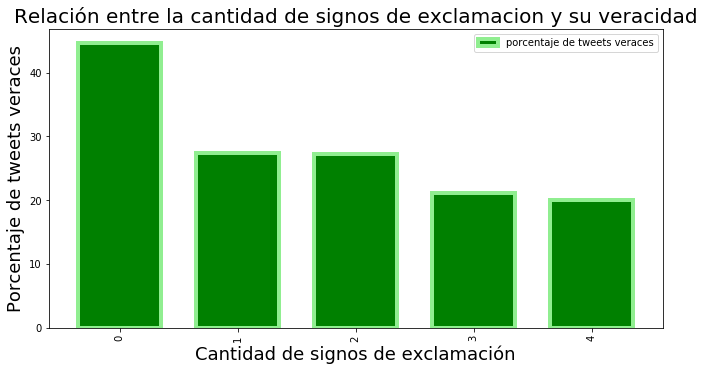

In [39]:
exclamacionGroup.plot(kind='bar', x='exclamacion', y='porcentaje de tweets veraces',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4)
g=plt.gca()
g.set_title("Relación entre la cantidad de signos de exclamacion y su veracidad",\
            fontsize=20);
g.set_xlabel("Cantidad de signos de exclamación", fontsize=18);
g.set_ylabel("Porcentaje de tweets veraces", fontsize=18);

Los tweets que tienen signos de interrogacion suelen ser mas fake que los que no tienen. Y pareciera que mientras mas signos de exclamacion tiene, es mas probable que sean fake.

# Idem, pero ahora con hashtags

In [40]:
hashtagGroup = tweets.groupby(['hashtag']).agg({'target':['sum','count']}).reset_index()
hashtagGroup.columns = ['hashtag','cantidad de veraces','total']

In [41]:
hashtagGroup['porcentaje de tweets veraces']=\
                    hashtagGroup['cantidad de veraces']/hashtagGroup['total']*100

In [43]:
#Los tweets que tienen mas de 5 hashtag son muy pocos y no sirven para establecer un patron, a esos no los tengo
#en cuenta para este analisis
hashtagGroup = hashtagGroup[hashtagGroup["total"]>26]

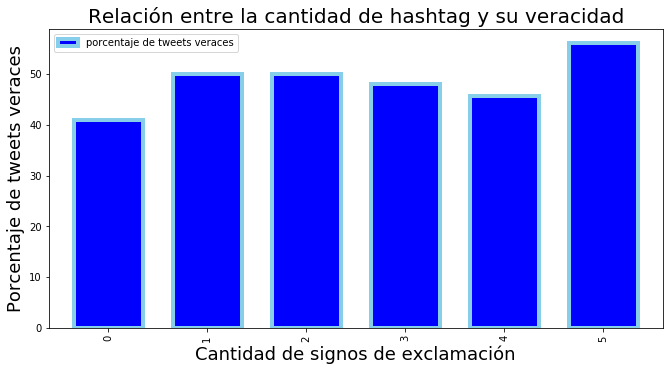

In [49]:
hashtagGroup.plot(kind='bar', x='hashtag', y='porcentaje de tweets veraces',\
                 width=0.7, figsize=(11,5.5), color='blue',\
                 edgecolor="skyblue", linewidth=4)
g=plt.gca()
g.set_title("Relación entre la cantidad de hashtag y su veracidad",\
            fontsize=20);
g.set_xlabel("Cantidad de hashtags", fontsize=18);
g.set_ylabel("Porcentaje de tweets veraces", fontsize=18);

No parece haber un patrón claro sobre los tweets y su cantidad de hashtag.

# Idem, pero ahora con @

In [6]:
atGroup = tweets.groupby(['at']).agg({'target':['sum','count']}).reset_index()
atGroup.columns = ['at','cantidad de veraces','total']

In [7]:
atGroup['porcentaje de tweets veraces']=\
                    atGroup['cantidad de veraces']/atGroup['total']*100

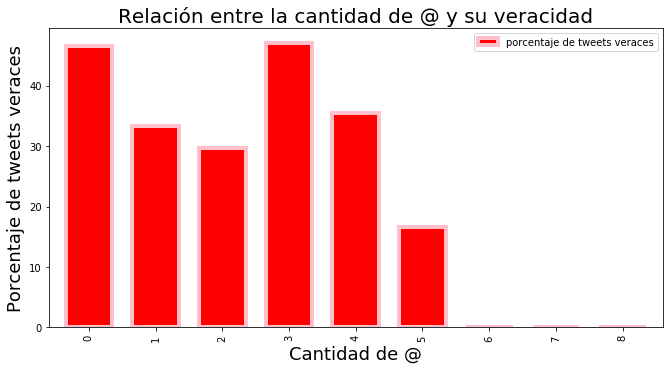

In [8]:
atGroup.plot(kind='bar', x='at', y='porcentaje de tweets veraces',\
                 width=0.7, figsize=(11,5.5), color='red',\
                 edgecolor="pink", linewidth=4)
g=plt.gca()
g.set_title("Relación entre la cantidad de @ y su veracidad",\
            fontsize=20);
g.set_xlabel("Cantidad de @", fontsize=18);
g.set_ylabel("Porcentaje de tweets veraces", fontsize=18);

No me arriesgaria a decir que existe un patron entre los tweets que citan a 0, 1, 2 o 3 usuarios, pero parece que desde 4 en adelante, esos tweets suelen ser fake.

# Analizo tweets en mayuscula

In [3]:
#Por cada tweet, cuento la cantidad de mayusculas, la cantidad total de caracteres y calculo el porcentaje de
#mayusculas
tweets['mayusculas'] = tweets['text'].str.count(r'[A-Z]')
tweets['longitud'] = tweets['text'].str.len()
tweets['porcentaje de mayusculas'] = tweets['mayusculas']/tweets['longitud']*100

In [4]:
#Agrupo por rango de porcentajes
bins = [0,10,20,30,40,50,60,70,80,90,100]
names = ["[0%-10%]","(10%-20%]","(20%-30%]","(30%-40%]","(40%-50%]","(50%-60%]","(60%-70%]","(70%-80%]",\
         "(80%-90%]","(90%-100%]"]
tweets["porcentaje"] = pd.cut(tweets["porcentaje de mayusculas"],bins,labels=names)

In [5]:
#Voy a sumar por rango de porcentaje para tener la cantidad de tweets veraces y totales
tweetsGroup = tweets.groupby(['porcentaje']).agg({'target':['sum','count']}).reset_index()
tweetsGroup.columns = ['porcentaje','cantidad de veraces','total']

In [6]:
tweetsGroup['porcentaje de tweets veraces']=tweetsGroup['cantidad de veraces']/tweetsGroup['total']*100

In [7]:
tweetsGroup

,porcentaje,cantidad de veraces,total,porcentaje de tweets veraces
0,[0%-10%],1948,4618,42.182763
1,(10%-20%],1068,2173,49.148642
2,(20%-30%],103,258,39.922481
3,(30%-40%],34,81,41.975309
4,(40%-50%],18,64,28.125000
5,(50%-60%],17,46,36.956522
6,(60%-70%],15,41,36.585366
7,(70%-80%],5,21,23.809524
8,(80%-90%],5,30,16.666667
9,(90%-100%],0,1,0.000000


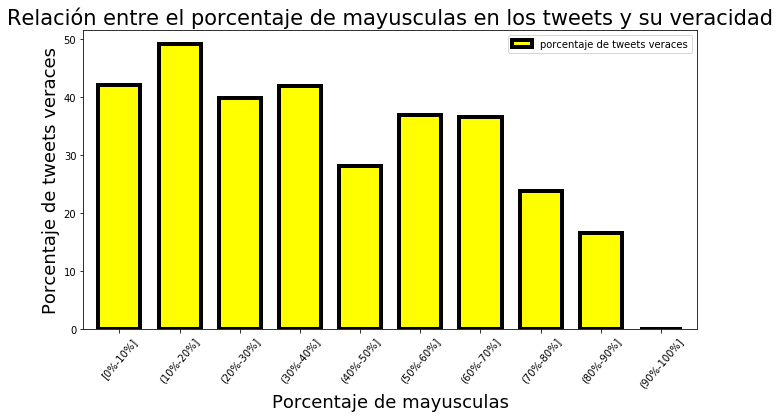

In [8]:
tweetsGroup.plot(kind='bar', x='porcentaje', y='porcentaje de tweets veraces',width=0.7, figsize=(11,5.5),\
                 color='yellow',edgecolor='black', linewidth=4, rot=50)
g=plt.gca()
g.set_title("Relación entre el porcentaje de mayusculas en los tweets y su veracidad",\
fontsize=21);
g.set_xlabel("Porcentaje de mayusculas", fontsize=18);
g.set_ylabel("Porcentaje de tweets veraces", fontsize=18);

Los tweets que tienen mas de 40% de mayusculas parecen ser mas fake a medida que mas mayusculas tienen

# Analisis de palabras

In [4]:
english_stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')

aQuitar = ['http','https','&amp']
english_stopwords.extend(aQuitar)

In [5]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [6]:
texto = tweets["text"]

textoVeridico = tweets[(tweets['target']==1)]
textoVeridico = textoVeridico["text"]

textoFalso = tweets[(tweets['target']==0)]
textoFalso = textoFalso["text"]

In [7]:
palabras=[]
for row in texto:
    row =row.lower()
    row=filter(None, re.split("[, \-!?:._¡¿'`<>;()+]", row))
    for palabra in row:
        if len(palabra)<4: #saco conectores
            continue
        if palabra not in english_stopwords:
            palabras.append(palabra)

In [8]:
palabrasVeridicas=[]
for row in textoVeridico:
    row =row.lower()
    row=filter(None, re.split("[, \-!?:._¡¿'`<>;()+]", row))
    for palabra in row:
        if len(palabra)<4: #saco conectores
            continue
        if palabra not in english_stopwords:
            palabrasVeridicas.append(palabra)

In [9]:
palabrasFalsas=[]
for row in textoFalso:
    row =row.lower()
    row=filter(None, re.split("[, \-!?:._¡¿'`<>;()+]", row))
    for palabra in row:
        if len(palabra)<4: #saco conectores
            continue
        if palabra not in english_stopwords:
            palabrasFalsas.append(palabra)

In [10]:
stems = stem_tokens(palabras, stemmer)
contador = Counter(stems)
palabrasComunes = contador.most_common(100)
palabrasComunes

[('like', 409),
 ('fire', 353),
 ('bomb', 232),
 ('peopl', 198),
 ('burn', 178),
 ('year', 175),
 ('kill', 174),
 ('time', 164),
 ('video', 163),
 ('crash', 160),
 ('emerg', 157),
 ('flood', 156),
 ('bodi', 153),
 ('attack', 152),
 ('build', 148),
 ('disast', 148),
 ('look', 143),
 ('home', 141),
 ('polic', 140),
 ('fatal', 140),
 ('love', 136),
 ('would', 136),
 ('famili', 130),
 ('train', 129),
 ('evacu', 128),
 ('make', 128),
 ('still', 127),
 ('come', 125),
 ('storm', 124),
 ('know', 122),
 ('back', 122),
 ('suicid', 120),
 ('news', 118),
 ('want', 117),
 ('california', 116),
 ('live', 116),
 ('watch', 115),
 ('collaps', 114),
 ('derail', 114),
 ('death', 110),
 ('take', 108),
 ('first', 108),
 ('caus', 106),
 ('think', 105),
 ('world', 105),
 ('go', 104),
 ('scream', 104),
 ('dead', 103),
 ('need', 101),
 ('drown', 101),
 ('work', 100),
 ('today', 100),
 ('wreck', 98),
 ('deton', 96),
 ('destroy', 95),
 ('accid', 94),
 ('nuclear', 94),
 ('feel', 93),
 ('hijack', 93),
 ('plan', 92)

In [11]:
stems = stem_tokens(palabrasVeridicas, stemmer)
contador = Counter(stems)
palabrasComunesVeridicas = contador.most_common(100)
palabrasComunesVeridicas

[('fire', 265),
 ('bomb', 181),
 ('kill', 157),
 ('flood', 112),
 ('suicid', 112),
 ('california', 111),
 ('crash', 110),
 ('year', 110),
 ('disast', 110),
 ('train', 109),
 ('polic', 107),
 ('peopl', 105),
 ('famili', 105),
 ('home', 103),
 ('attack', 103),
 ('like', 103),
 ('evacu', 99),
 ('build', 94),
 ('fatal', 91),
 ('storm', 91),
 ('derail', 87),
 ('burn', 86),
 ('news', 82),
 ('emerg', 75),
 ('live', 72),
 ('report', 70),
 ('accid', 69),
 ('video', 69),
 ('collaps', 69),
 ('dead', 68),
 ('hiroshima', 68),
 ('wildfir', 66),
 ('murder', 66),
 ('caus', 65),
 ('nuclear', 65),
 ('mh370', 65),
 ('near', 64),
 ('northern', 64),
 ('death', 63),
 ('legionnair', 62),
 ('bomber', 61),
 ('time', 60),
 ('warn', 60),
 ('watch', 60),
 ('confirm', 60),
 ('devast', 60),
 ('atom', 57),
 ('still', 56),
 ('sever', 55),
 ('typhoon', 55),
 ('obama', 54),
 ('today', 53),
 ('look', 53),
 ('investig', 53),
 ('first', 50),
 ('debri', 50),
 ('#new', 50),
 ('water', 50),
 ('mass', 49),
 ('deton', 49),
 ('

In [12]:
stems = stem_tokens(palabrasFalsas, stemmer)
contador = Counter(stems)
palabrasComunesFalsas = contador.most_common(100)
palabrasComunesFalsas

[('like', 306),
 ('love', 119),
 ('bodi', 117),
 ('time', 104),
 ('would', 100),
 ('want', 98),
 ('make', 96),
 ('video', 94),
 ('peopl', 93),
 ('burn', 92),
 ('know', 91),
 ('look', 90),
 ('scream', 89),
 ('come', 88),
 ('fire', 88),
 ('back', 87),
 ('full', 83),
 ('think', 82),
 ('emerg', 82),
 ('wreck', 81),
 ('fuck', 77),
 ('feel', 77),
 ('obliter', 77),
 ('go', 76),
 ('work', 72),
 ('need', 72),
 ('drown', 72),
 ('still', 71),
 ('bag', 71),
 ('take', 69),
 ('world', 69),
 ('good', 67),
 ('year', 65),
 ('@youtub', 65),
 ('explod', 61),
 ('life', 60),
 ('get', 60),
 ('crush', 60),
 ('last', 58),
 ('first', 58),
 ('destroy', 58),
 ('even', 58),
 ('help', 56),
 ('surviv', 56),
 ('realli', 55),
 ('watch', 55),
 ('build', 54),
 ('thing', 54),
 ('injuri', 53),
 ('plan', 52),
 ('reddit', 52),
 ('quarantin', 52),
 ('much', 51),
 ('mani', 51),
 ('right', 51),
 ('play', 51),
 ('bomb', 51),
 ('read', 50),
 ('crash', 50),
 ('thank', 49),
 ('attack', 49),
 ('cross', 49),
 ('delug', 49),
 ('fata